## 가중평균반사도 예측모형

- 이미지 픽셀 값 -> 반사도를 predict 하는 모델 구축

### 데이터 전처리 부분

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Solar.csv",header=0).iloc[:,:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   R          32 non-null     int64  
 1   G          32 non-null     int64  
 2   B          32 non-null     int64  
 3   R_I        32 non-null     object 
 4   Thickness  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [3]:
df.head()

,R,G,B,R_I,Thickness
0,25,31,53,1.947,73.1
1,6,12,40,1.946,73.2
2,9,14,20,1.949,72.5
3,3,7,36,1.948,73.9
4,15,21,55,1.965,74.2


In [4]:
df.R_I = df.R_I.str.replace(",",".").astype(float)

In [5]:
reflectance = pd.read_csv('reflectance.csv',header=0)
reflectance.head()

,1200,1195,1190,1185,1180,1175,1170,1165,1160,1155,...,345,340,335,330,325,320,315,310,305,300
0,96.6331,96.5916,96.4845,96.2623,95.8907,95.3450,94.6298,93.7546,92.7405,91.5877,...,56.3231,55.9099,55.8171,55.6715,55.4601,55.1395,54.6931,54.1511,53.5249,52.8991
1,92.4867,92.4547,92.3593,92.1557,91.8202,91.3254,90.6806,89.8845,88.9556,87.8934,...,56.7971,56.5143,56.4169,56.2839,56.0708,55.7749,55.3640,54.8170,54.2150,53.6033
2,96.9970,96.9578,96.8509,96.6398,96.2781,95.7467,95.0391,94.1767,93.1700,92.0249,...,56.3937,56.2287,56.2186,56.1558,56.0490,55.8406,55.5234,55.0830,54.6321,54.1589
3,96.7672,96.7216,96.6133,96.3942,96.0234,95.4852,94.7694,93.8971,92.8864,91.7317,...,56.3366,55.9816,55.9209,55.8066,55.6147,55.3500,54.9550,54.4818,53.9408,53.3935
4,97.2375,97.1881,97.0759,96.8496,96.4741,95.9199,95.1903,94.2958,93.2626,92.0902,...,56.4141,55.8102,55.4447,55.0348,54.5248,53.8755,53.1101,52.1799,51.1362,49.9881


In [6]:
y_cols = reflectance.columns
y_cols

Index(['1200', '1195', '1190', '1185', '1180', '1175', '1170', '1165', '1160',
       '1155',
       ...
       '345', '340', '335', '330', '325', '320', '315', '310', '305', '300'],
      dtype='object', length=181)

In [7]:
seed = 42

In [11]:
dt = pd.concat([df,reflectance],axis=1)
dt.head()

,R,G,B,R_I,Thickness,1200,1195,1190,1185,1180,...,345,340,335,330,325,320,315,310,305,300
0,25,31,53,1.947,73.1,96.6331,96.5916,96.4845,96.2623,95.8907,...,56.3231,55.9099,55.8171,55.6715,55.4601,55.1395,54.6931,54.1511,53.5249,52.8991
1,6,12,40,1.946,73.2,92.4867,92.4547,92.3593,92.1557,91.8202,...,56.7971,56.5143,56.4169,56.2839,56.0708,55.7749,55.3640,54.8170,54.2150,53.6033
2,9,14,20,1.949,72.5,96.9970,96.9578,96.8509,96.6398,96.2781,...,56.3937,56.2287,56.2186,56.1558,56.0490,55.8406,55.5234,55.0830,54.6321,54.1589
3,3,7,36,1.948,73.9,96.7672,96.7216,96.6133,96.3942,96.0234,...,56.3366,55.9816,55.9209,55.8066,55.6147,55.3500,54.9550,54.4818,53.9408,53.3935
4,15,21,55,1.965,74.2,97.2375,97.1881,97.0759,96.8496,96.4741,...,56.4141,55.8102,55.4447,55.0348,54.5248,53.8755,53.1101,52.1799,51.1362,49.9881


### Train_test split

In [12]:
from sklearn.model_selection import train_test_split
dt_train, dt_test = train_test_split(dt, test_size=0.3, random_state=seed)

print(len(dt_train), len(dt_test))

22 10


### AutoML TEST

In [13]:
datalist = []
for i in range(len(dt_train)):
    for j in range(len(y_cols)):
        datalist.append([dt_train.iloc[i,0],dt_train.iloc[i,1],dt_train.iloc[i,2],dt_train.iloc[i,3],dt_train.iloc[i,4],y_cols[j],dt_train.iloc[i,5+j]])
        
datalist_2 = []
for i in range(len(dt_test)):
    for j in range(len(y_cols)):
        datalist_2.append([dt_test.iloc[i,0],dt_test.iloc[i,1],dt_test.iloc[i,2],dt_test.iloc[i,3],dt_test.iloc[i,4],y_cols[j],dt_test.iloc[i,5+j]])
        
train_data = pd.DataFrame(datalist, columns = ['R','G','B','R.I','Thickness','Wavelength','Reflectance'])
test_data = pd.DataFrame(datalist_2, columns = ['R','G','B','R.I','Thickness','Wavelength','Reflectance'])

In [14]:
train_data

,R,G,B,R.I,Thickness,Wavelength,Reflectance
0,15,21,55,1.965,74.2,1200,97.2375
1,15,21,55,1.965,74.2,1195,97.1881
2,15,21,55,1.965,74.2,1190,97.0759
3,15,21,55,1.965,74.2,1185,96.8496
4,15,21,55,1.965,74.2,1180,96.4741
...,...,...,...,...,...,...,...
3977,11,18,37,1.966,74.0,320,54.1854
3978,11,18,37,1.966,74.0,315,53.4453
3979,11,18,37,1.966,74.0,310,52.5741
3980,11,18,37,1.966,74.0,305,51.5893


In [15]:
test_data

,R,G,B,R.I,Thickness,Wavelength,Reflectance
0,62,85,103,1.959,118.2,1200,97.4632
1,62,85,103,1.959,118.2,1195,97.4011
2,62,85,103,1.959,118.2,1190,97.2705
3,62,85,103,1.959,118.2,1185,97.0195
4,62,85,103,1.959,118.2,1180,96.6016
...,...,...,...,...,...,...,...
1805,25,31,53,1.947,73.1,320,55.1395
1806,25,31,53,1.947,73.1,315,54.6931
1807,25,31,53,1.947,73.1,310,54.1511
1808,25,31,53,1.947,73.1,305,53.5249


### 여러 모델 시도

In [16]:
#RGB + Wavelength -> Reflectance
X_RGB_train = train_data.drop(columns=['R.I','Thickness','Reflectance'],axis=1)
Y_RGB_train = train_data.iloc[:,-1]
X_RGB_test = test_data.drop(columns=['R.I','Thickness','Reflectance'],axis=1)
Y_RGB_test = test_data.iloc[:,-1]

#RGB + R.I + wavelength -> Reflectance
X_RI_train = train_data.drop(columns=['Thickness','Reflectance'],axis=1)
Y_RI_train = train_data.iloc[:,-1]
X_RI_test = test_data.drop(columns=['Thickness','Reflectance'],axis=1)
Y_RI_test = test_data.iloc[:,-1]

#RGB + Thickness + wavelength -> Reflectance
X_T_train = train_data.drop(columns=['R.I','Reflectance'],axis=1)
Y_T_train = train_data.iloc[:,-1]
X_T_test = test_data.drop(columns=['R.I','Reflectance'],axis=1) 
Y_T_test = test_data.iloc[:,-1]

#RGB + R.I + Thickness + wavelength -> Reflectance
X_all_train = train_data.drop(columns=['Reflectance'],axis=1)
Y_all_train = train_data.iloc[:,-1]
X_all_test = test_data.drop(columns=['Reflectance'],axis=1)
Y_all_test = test_data.iloc[:,-1]

In [17]:
from tpot import TPOTRegressor
from sklearn.model_selection import KFold

# without cross-validation 
tpot_RGB = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed)
tpot_RGB.fit(X_RGB_train, Y_RGB_train)
print(tpot_RGB.score(X_RGB_test, Y_RGB_test))
tpot_RGB.export('tpot_RGB_pipeline.py')

tpot_RI = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed)
tpot_RI.fit(X_RI_train, Y_RI_train)
print(tpot_RI.score(X_RI_test, Y_RI_test))
tpot_RI.export('tpot_RI_pipeline.py')

tpot_T = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed)
tpot_T.fit(X_T_train, Y_T_train)
print(tpot_T.score(X_T_test, Y_T_test))
tpot_T.export('tpot_T_pipeline.py')

tpot_all = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed)
tpot_all.fit(X_all_train, Y_all_train)
print(tpot_all.score(X_all_test, Y_all_test))
tpot_all.export('tpot_all_pipeline.py')



# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# with cross-validation
tpot_RGB_fold = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed, cv=kf)
tpot_RGB_fold.fit(X_RGB_train, Y_RGB_train)
print(tpot_RGB_fold.score(X_RGB_test, Y_RGB_test))
tpot_RGB_fold.export('tpot_RGB_fold_pipeline.py')

tpot_RI_fold = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed, cv=kf)
tpot_RI_fold.fit(X_RI_train, Y_RI_train)
print(tpot_RI_fold.score(X_RI_test, Y_RI_test))
tpot_RI_fold.export('tpot_RI_fold_pipeline.py')

tpot_T_fold = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed, cv=kf)
tpot_T_fold.fit(X_T_train, Y_T_train)
print(tpot_T_fold.score(X_T_test, Y_T_test))
tpot_T_fold.export('tpot_T_fold_pipeline.py')

tpot_all_fold = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=seed, cv=kf)
tpot_all_fold.fit(X_all_train, Y_all_train)
print(tpot_all_fold.score(X_all_test, Y_all_test))
tpot_all_fold.export('tpot_all_fold_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17.664890257135703

Generation 2 - Current best internal CV score: -13.859082180080383

Generation 3 - Current best internal CV score: -13.859082180080383

Generation 4 - Current best internal CV score: -13.859082180080383

Generation 5 - Current best internal CV score: -12.179621911784329

Best pipeline: ExtraTreesRegressor(CombineDFs(SelectPercentile(CombineDFs(input_matrix, input_matrix), percentile=91), FastICA(input_matrix, tol=0.15000000000000002)), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=20, min_samples_split=7, n_estimators=100)


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-10.137666662432256


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -18.475280730775346

Generation 2 - Current best internal CV score: -15.987286958825269

Generation 3 - Current best internal CV score: -15.987286958825269

Generation 4 - Current best internal CV score: -15.987286958825269

Generation 5 - Current best internal CV score: -13.831829767511152

Best pipeline: RandomForestRegressor(MaxAbsScaler(input_matrix), bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=5, n_estimators=100)


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-24.69557733572871


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.399721646734666

Generation 2 - Current best internal CV score: -7.399721646734666

Generation 3 - Current best internal CV score: -4.32363391379459

Generation 4 - Current best internal CV score: -4.32363391379459

Generation 5 - Current best internal CV score: -4.32363391379459

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=9, n_estimators=100)


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-4.222808078101914


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.7912845082859885

Generation 2 - Current best internal CV score: -6.7912845082859885

Generation 3 - Current best internal CV score: -6.720289273261683

Generation 4 - Current best internal CV score: -6.169880432638069

Generation 5 - Current best internal CV score: -5.618899818609263

Best pipeline: RandomForestRegressor(DecisionTreeRegressor(GradientBoostingRegressor(input_matrix, alpha=0.99, learning_rate=0.5, loss=huber, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=20, min_samples_split=13, n_estimators=100, subsample=0.9500000000000001), max_depth=3, min_samples_leaf=6, min_samples_split=13), bootstrap=True, max_features=0.8, min_samples_leaf=8, min_samples_split=12, n_estimators=100)


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-2.5809455780651946


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.6809619307082566

Generation 2 - Current best internal CV score: -1.6809619307082566

Generation 3 - Current best internal CV score: -1.4160339776035804

Generation 4 - Current best internal CV score: -0.6635280492725076

Generation 5 - Current best internal CV score: -0.6635280492725076

Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, input_matrix), bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_estimators=100)


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-42.10530751444348


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.843873773431447

Generation 2 - Current best internal CV score: -1.3398581633268671

Generation 3 - Current best internal CV score: -1.3398581633268671

Generation 4 - Current best internal CV score: -1.3398581633268671

Generation 5 - Current best internal CV score: -1.3398581633268671

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=7, min_samples_split=8, n_estimators=100)


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-28.472653955786488


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.606696317628648

Generation 2 - Current best internal CV score: -0.606696317628648

Generation 3 - Current best internal CV score: -0.606696317628648

Generation 4 - Current best internal CV score: -0.46845815177368655

Generation 5 - Current best internal CV score: -0.3861127854279432

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=9, p=1, weights=distance)
-2.5432951209817385


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6571167690393249

Generation 2 - Current best internal CV score: -0.5929492479024023

Generation 3 - Current best internal CV score: -0.5928064522233057

Generation 4 - Current best internal CV score: -0.4992302805384698

Generation 5 - Current best internal CV score: -0.4992302805384698

Best pipeline: RidgeCV(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=2, min_samples_split=4, n_estimators=100))
-5.009752625959993


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
def plot_y_pred_and_y_test(y_pred, y_test):
    plt.figure(figsize=(8,8))
    plt.plot(y_pred,y_test,'o',label='data')
    plt.legend()
    plt.show()

In [19]:
def mse(y_pred, y_test):
    return np.mean((y_pred - y_test)**2)

def mape(y_pred, y_test):
    return np.mean(np.abs((y_pred - y_test)/y_test))

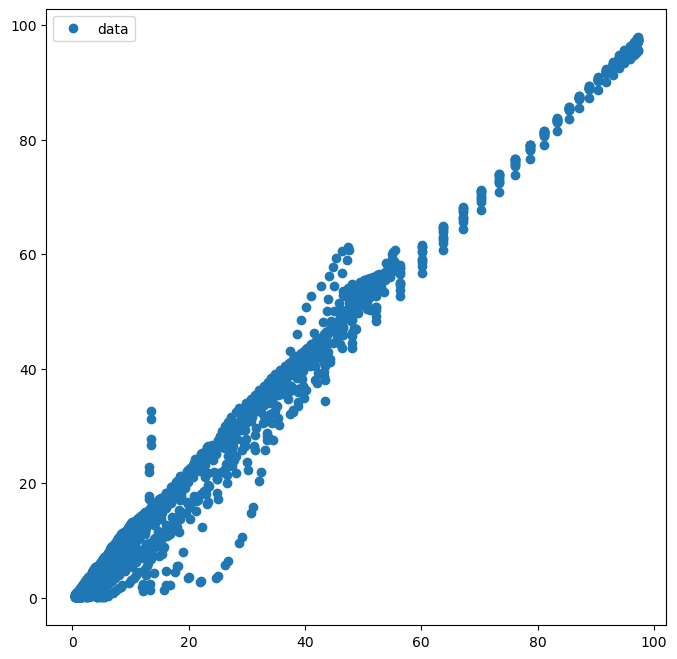

In [32]:
#RGB + Wavelength -> Reflectance (without cross-validation)
plot_y_pred_and_y_test(tpot_RGB.predict(X_RGB_test), Y_RGB_test)

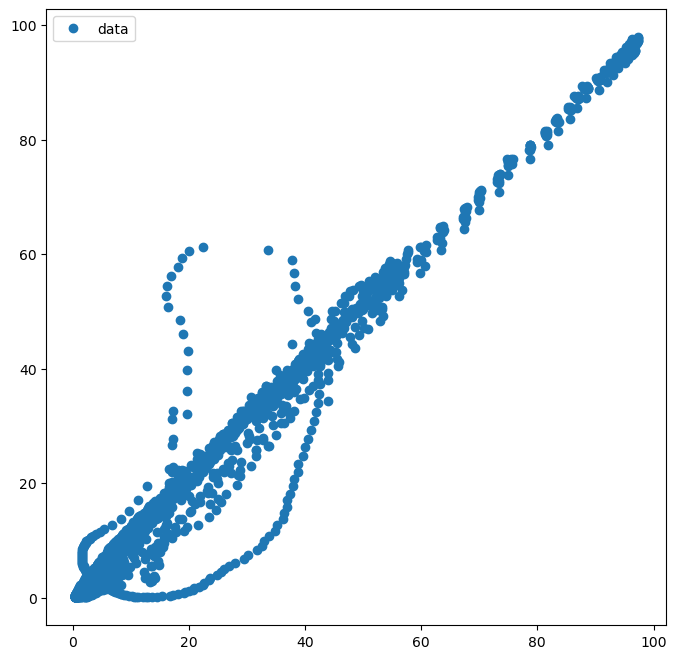

In [33]:
#RGB + R.I + wavelength -> Reflectance (without cross-validation)
plot_y_pred_and_y_test(tpot_RI.predict(X_RI_test), Y_RI_test)

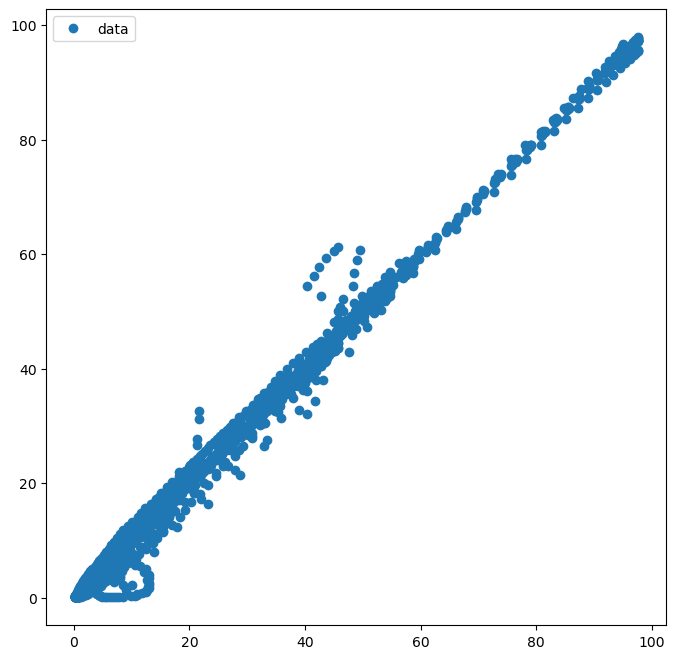

In [34]:
# RGB + Thickness + wavelength -> Reflectance (without cross-validation)
plot_y_pred_and_y_test(tpot_T.predict(X_T_test), Y_T_test)

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


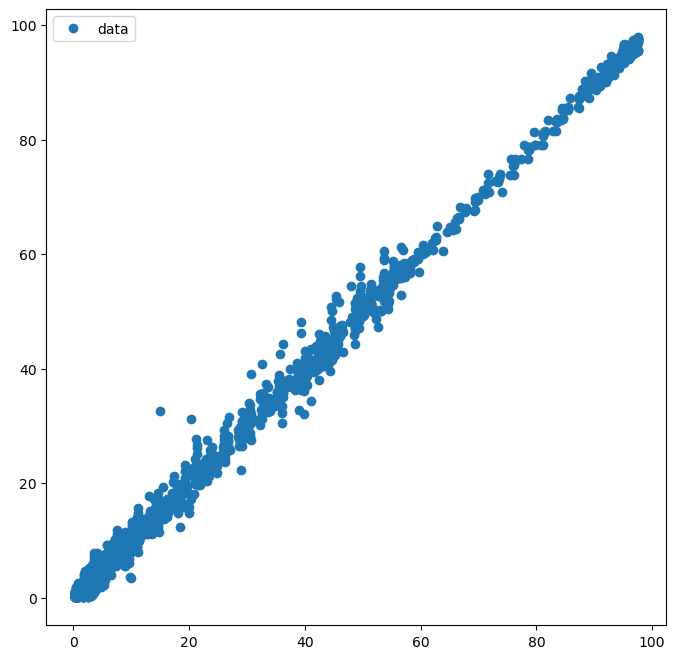

In [35]:
# RGB + R.I + Thickness + wavelength -> Reflectance (without cross-validation)
plot_y_pred_and_y_test(tpot_all.predict(X_all_test), Y_all_test)

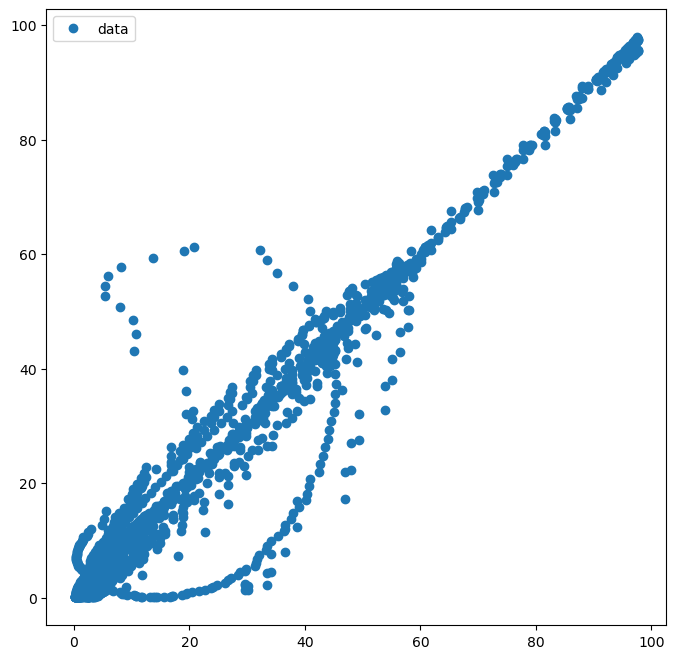

In [36]:
#RGB + Wavelength -> Reflectance (with cross-validation)
plot_y_pred_and_y_test(tpot_RGB_fold.predict(X_RGB_test), Y_RGB_test)

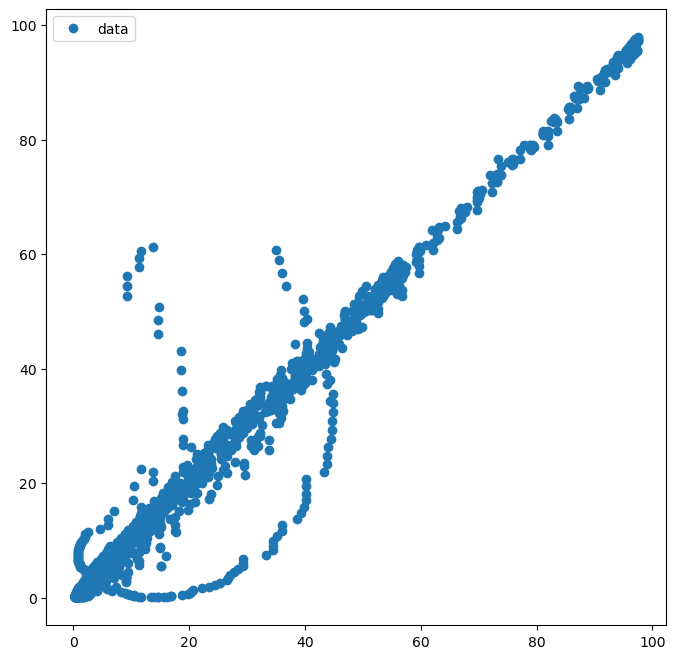

In [37]:
#RGB + R.I + wavelength -> Reflectance (with cross-validation)
plot_y_pred_and_y_test(tpot_RI_fold.predict(X_RI_test), Y_RI_test)

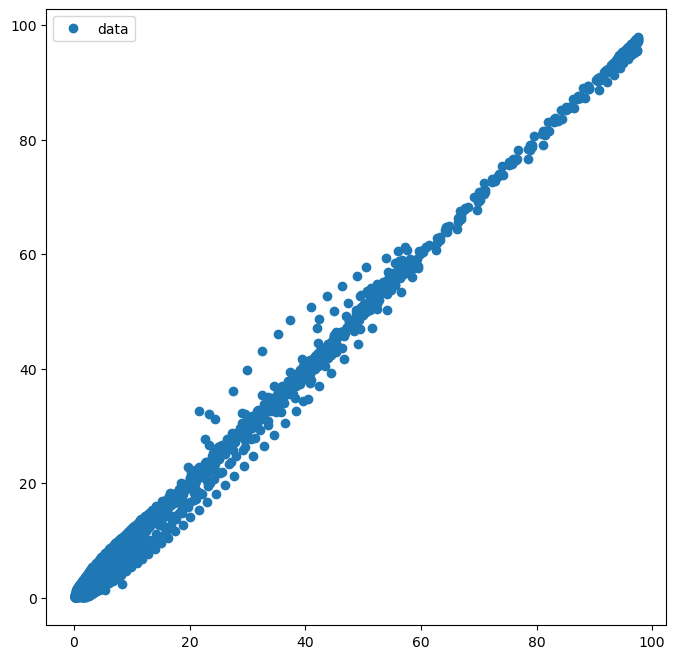

In [38]:
# RGB + Thickness + wavelength -> Reflectance (with cross-validation)
plot_y_pred_and_y_test(tpot_T_fold.predict(X_T_test), Y_T_test)

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


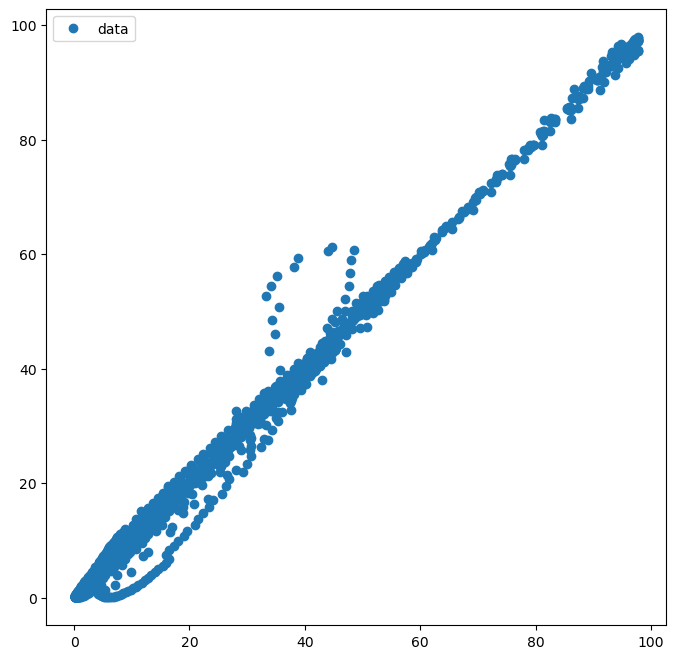

In [39]:
# RGB + R.I + Thickness + wavelength -> Reflectance (with cross-validation)
plot_y_pred_and_y_test(tpot_all_fold.predict(X_all_test), Y_all_test)

In [65]:
mse_RGB = mse(tpot_RGB.predict(X_RGB_test), Y_RGB_test)
mape_RGB = mape(tpot_RGB.predict(X_RGB_test), Y_RGB_test)
mse_RI = mse(tpot_RI.predict(X_RI_test), Y_RI_test)
mape_RI = mape(tpot_RI.predict(X_RI_test), Y_RI_test)
mse_T = mse(tpot_T.predict(X_T_test), Y_T_test)
mape_T = mape(tpot_T.predict(X_T_test), Y_T_test)
mse_all = mse(tpot_all.predict(X_all_test), Y_all_test)
mape_all = mape(tpot_all.predict(X_all_test), Y_all_test)
mse_RGB_fold = mse(tpot_RGB_fold.predict(X_RGB_test), Y_RGB_test)
mape_RGB_fold = mape(tpot_RGB_fold.predict(X_RGB_test), Y_RGB_test)
mse_RI_fold = mse(tpot_RI_fold.predict(X_RI_test), Y_RI_test)
mape_RI_fold = mape(tpot_RI_fold.predict(X_RI_test), Y_RI_test)
mse_T_fold = mse(tpot_T_fold.predict(X_T_test), Y_T_test)
mape_T_fold = mape(tpot_T_fold.predict(X_T_test), Y_T_test)
mse_all_fold = mse(tpot_all_fold.predict(X_all_test), Y_all_test)
mape_all_fold = mape(tpot_all_fold.predict(X_all_test), Y_all_test)


metrics = pd.DataFrame({'mse':[mse_RGB, mse_RI, mse_T, mse_all, mse_RGB_fold, mse_RI_fold, mse_T_fold, mse_all_fold],'mape':[mape_RGB, mape_RI, mape_T, mape_all, mape_RGB_fold, mape_RI_fold, mape_T_fold, mape_all_fold]}, index=['RGB','RI','T','all','RGB_fold','RI_fold','T_fold','all_fold'])


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [66]:
metrics

,mse,mape
RGB,10.137667,1.001092
RI,24.695577,1.277854
T,4.222808,0.660641
all,2.580946,0.341328
RGB_fold,42.105308,1.676566
RI_fold,28.472654,1.259533
T_fold,2.543295,0.264868
all_fold,5.009753,0.576216


RGB + Thickness 만을 사용한 것이 더 효과적으로 나타남.